In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising/Advertising.csv
/kaggle/input/my-datasets/advertising.csv
/kaggle/input/hearingdata/hearing_test.csv


# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')
df2 = pd.read_csv('/kaggle/input/hearingdata/hearing_test.csv')

# IMPORT LIBARY

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Explatory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

Menambahkan Feature Spend dari total biaya iklan yang dikeluarkan

In [9]:
df['total_spend']=df['TV']+df['radio']+df['sales']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,290.0
1,44.5,39.3,45.1,10.4,94.2
2,17.2,45.9,69.3,9.3,72.4
3,151.5,41.3,58.5,18.5,211.3
4,180.8,10.8,58.4,12.9,204.5


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

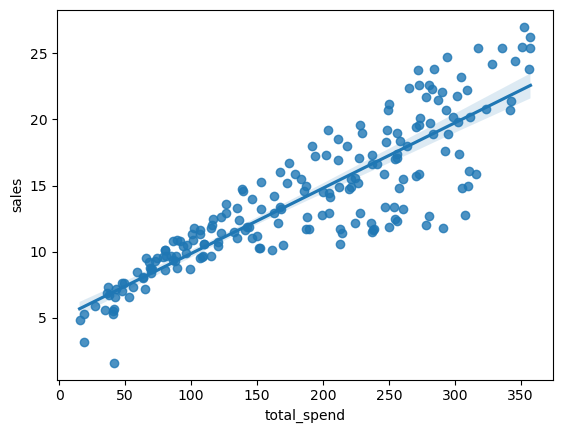

In [10]:
import seaborn as sns
sns.regplot(x='total_spend',y='sales',data=df)

In [11]:
X = df['total_spend']
y = df['sales']

In [12]:
np.polyfit(X,y,1)

array([0.04939508, 4.91755413])

In [13]:
x=9
preidctedsales=0.04939508*x+4.91755413
preidctedsales

5.36210985

In [14]:
def mse(my_yhat,my_y):
    return (sum((my_yhat-my_y)**2)/len(my_y))

In [15]:
def regression (my_x):
    return 0.04939508*my_x + 4.91755413

In [16]:
def regression (my_x):
    return 0.04939508*my_x + 4.91755413

In [17]:
yhats=regression(X)
yhats

0      19.242127
1       9.570571
2       8.493758
3      15.354735
4      15.018848
         ...    
195     7.362611
196    10.291739
197    14.752115
198    22.260167
199    17.468844
Name: total_spend, Length: 200, dtype: float64

In [18]:
C=mse(yhats,y)
C

6.33306745551608

# Multi Liner Regresion

In [19]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,290.0
1,44.5,39.3,45.1,10.4,94.2
2,17.2,45.9,69.3,9.3,72.4
3,151.5,41.3,58.5,18.5,211.3
4,180.8,10.8,58.4,12.9,204.5
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,49.5
196,94.2,4.9,8.1,9.7,108.8
197,177.0,9.3,6.4,12.8,199.1
198,283.6,42.0,66.2,25.5,351.1


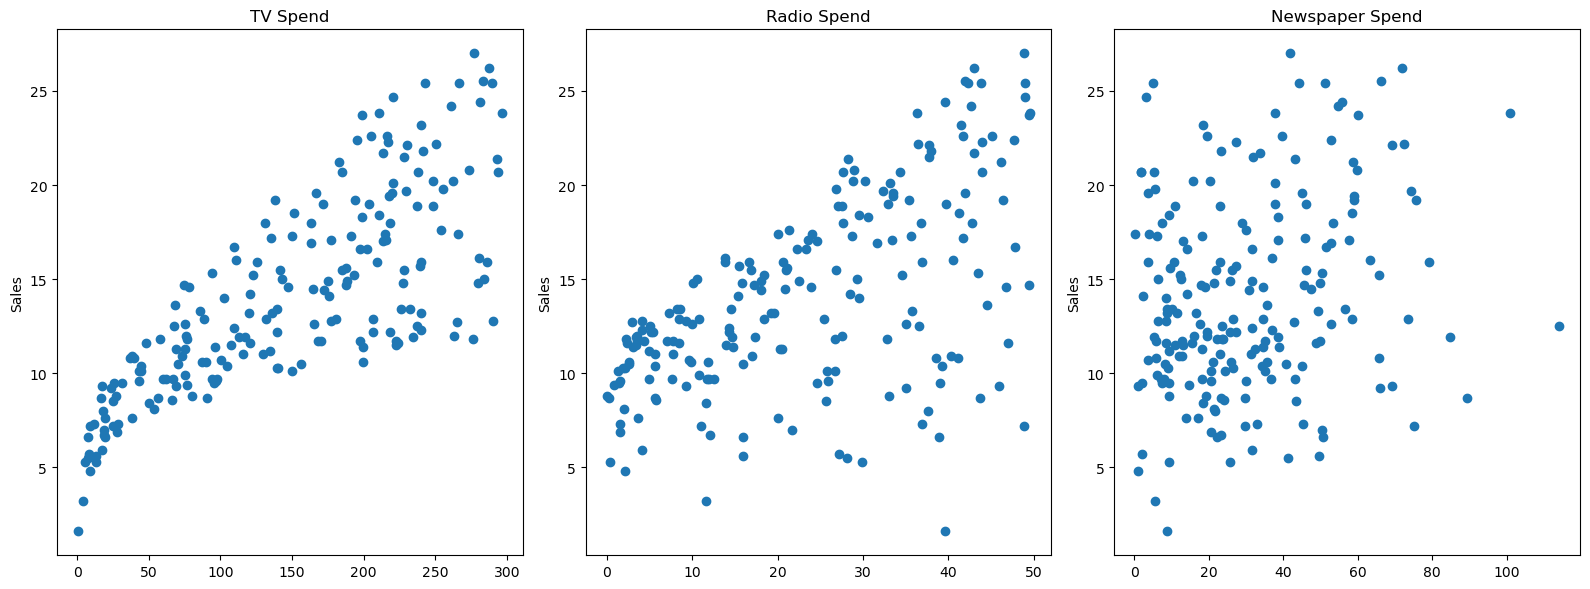

In [20]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [21]:
df.describe()

,TV,radio,newspaper,sales,total_spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,184.329000
std,85.854236,14.846809,21.778621,5.217457,92.457429
min,0.700000,0.000000,0.300000,1.600000,15.500000
25%,74.375000,9.975000,12.750000,10.375000,101.900000
50%,149.750000,22.900000,25.750000,12.900000,188.950000
75%,218.825000,36.525000,45.100000,17.400000,259.100000
max,296.400000,49.600000,114.000000,27.000000,357.400000


In [22]:
y=df['sales']
X=df[['TV','radio','newspaper']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_hat = model.predict(X)

In [26]:
mse(y_hat,y)

2.7957867526765092

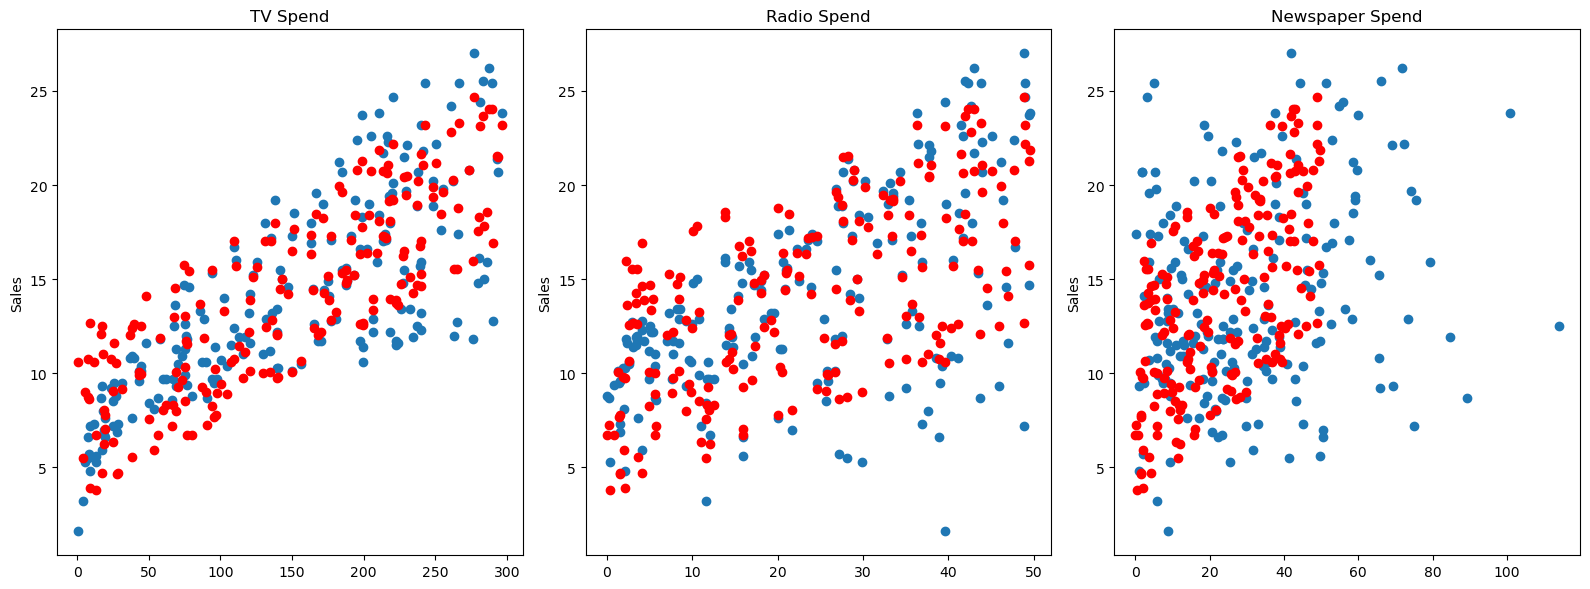

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
MAE = mean_absolute_error(y_hat,y)
MSE = mean_squared_error(y_hat,y)
MAPE = mean_absolute_percentage_error(y_hat,y)
r2score = r2_score(y_hat,y)
print(MAE, MSE,MAPE,r2score)

1.2408361444761495 2.79578675267651 0.10841981982635293 0.8811131128741965


# Polynomial

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_hat = model.predict(X_test)

In [33]:
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
print(MAE, MSE,MAPE)

0.4896798044803852 0.44175055104037636 0.04852550023988213


<AxesSubplot:ylabel='sales'>

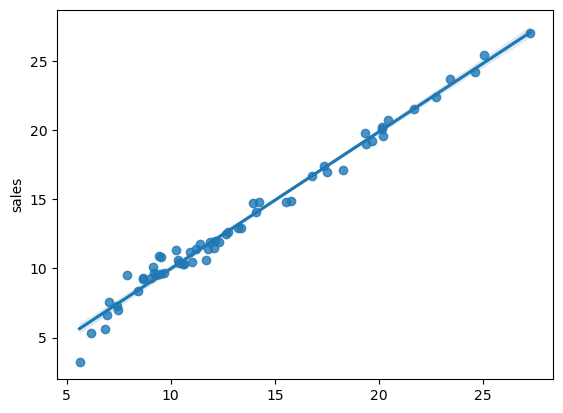

In [34]:
import seaborn as sns
sns.regplot(x=y_hat,y=y_test)

# Regulerization

In [35]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,290.0
1,44.5,39.3,45.1,10.4,94.2
2,17.2,45.9,69.3,9.3,72.4
3,151.5,41.3,58.5,18.5,211.3
4,180.8,10.8,58.4,12.9,204.5
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,49.5
196,94.2,4.9,8.1,9.7,108.8
197,177.0,9.3,6.4,12.8,199.1
198,283.6,42.0,66.2,25.5,351.1


In [36]:
X = df.drop('sales',axis=1)
y = df['sales']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [38]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
X_train

array([[ 0.53897548, -0.3284346 ,  1.61783412, ...,  2.61738724,
         0.74502891,  0.21206953],
       [ 1.64127273,  1.33264499,  1.89862818, ...,  3.60478898,
         3.55060737,  3.49724013],
       [-0.7805117 , -1.57086811, -0.98296335, ...,  0.96621694,
         1.01603579,  1.06842334],
       ...,
       [ 1.08311798, -1.29402151,  0.29211789, ...,  0.08533286,
         0.22764519,  0.60729634],
       [ 0.79002835,  0.04969734, -1.22232878, ...,  1.49408764,
        -0.95122593,  0.60560756],
       [ 0.18983684,  0.5628764 ,  1.02862691, ...,  1.05807331,
         0.30639311,  0.08872423]])

# Ridge Regresion L2

In [40]:
from sklearn.linear_model import Ridge

In [41]:
r_model=Ridge()
r_model.fit(X_train,y_train)

Ridge()

In [42]:
pred=r_model.predict(X_test)

In [43]:
MAE = mean_absolute_error(pred,y_test)
MSE = mean_squared_error(pred,y_test)
MAPE = mean_absolute_percentage_error(pred,y_test)
print(MAE, MSE,MAPE)

0.46940178108299996 0.40186232054250526 0.046363970300432045


In [44]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [45]:
# Training Set Performance
predictions = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(predictions,y_test)
MSE = mean_squared_error(predictions,y_test)
MAPE = mean_absolute_percentage_error(predictions,y_test)
print(MAE, MSE,MAPE)

0.41858871142966925 0.3141988247541892 0.04086973421246109


# L1 Lasso

In [46]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [47]:
# Training Set Performance
predictions = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(predictions,y_test)
MSE = mean_squared_error(predictions,y_test)
MAPE = mean_absolute_percentage_error(predictions,y_test)
print(MAE, MSE,MAPE)

0.7228662536976694 1.069245715068131 0.06299464127454664


# Elastic NEt

In [48]:
from sklearn.linear_model import ElasticNetCV

In [49]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [50]:
elastic_model.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.01,
 'verbose': 0}

In [51]:
# Training Set Performance
predictions = elastic_model.predict(X_test)

MAE = mean_absolute_error(predictions,y_test)
MSE = mean_squared_error(predictions,y_test)
MAPE = mean_absolute_percentage_error(predictions,y_test)
print(MAE, MSE,MAPE)

0.4728485573435305 0.42471401903410283 0.0471904089909382


# Logistic Regresion

In [52]:
df2

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [53]:
df2.groupby(['test_result']).size()

test_result
0    2000
1    3000
dtype: int64

In [54]:
2000/5000

0.4

In [55]:
df.describe()

,TV,radio,newspaper,sales,total_spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,184.329000
std,85.854236,14.846809,21.778621,5.217457,92.457429
min,0.700000,0.000000,0.300000,1.600000,15.500000
25%,74.375000,9.975000,12.750000,10.375000,101.900000
50%,149.750000,22.900000,25.750000,12.900000,188.950000
75%,218.825000,36.525000,45.100000,17.400000,259.100000
max,296.400000,49.600000,114.000000,27.000000,357.400000


In [56]:
df2_cor=df.corr()
df2_cor

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.981524
radio,0.054809,1.000000,0.354104,0.576223,0.243991
newspaper,0.056648,0.354104,1.000000,0.228299,0.122347
sales,0.782224,0.576223,0.228299,1.000000,0.875320
total_spend,0.981524,0.243991,0.122347,0.875320,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x794e2390cd50>,
 'caps': [<matplotlib.lines.Line2D at 0x794e23911310>,
 'boxes': [<matplotlib.lines.Line2D at 0x794e2390c910>,
 'medians': [<matplotlib.lines.Line2D at 0x794e239119d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x794e23911c90>,
 'means': []}

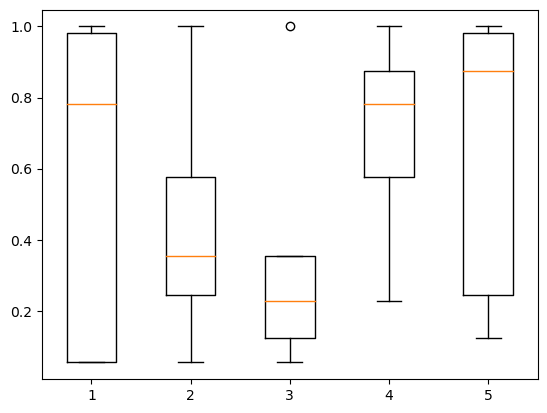

In [57]:
plt.boxplot(df2_cor)

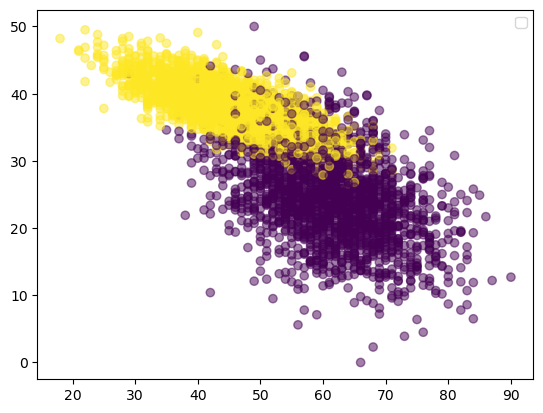

In [58]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(df2['age'],df2['physical_score'],c=df2['test_result'],alpha=0.5)
# Assign the cluster centers: centroids
#centroids = kmeans.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
plt.legend()
plt.show()

<AxesSubplot:>

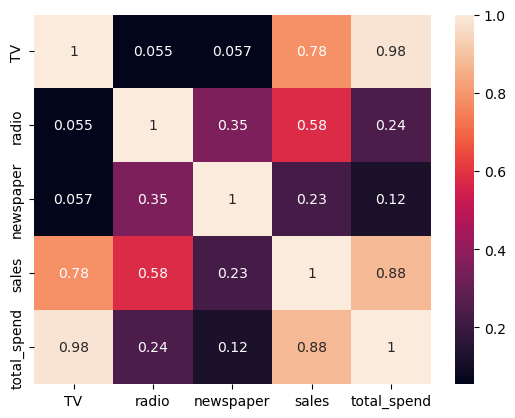

In [59]:
sns.heatmap(df.corr(),annot=True)

In [60]:
X = df2.drop('test_result',axis=1)
y = df2['test_result']

In [61]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [62]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.76515175,  1.09146993],
       [-0.28213057,  0.68268649],
       [-0.10765749, -0.77725436],
       ...,
       [-0.02042095, -0.6237985 ],
       [ 0.06681559, -0.44063196],
       [-0.3708498 , -1.03420395]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score, classification_report

In [67]:
y_pred = log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.915

In [68]:
y_pred = log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.915

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       281
           1       0.90      0.95      0.92       319

    accuracy                           0.92       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.92      0.91       600



In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       281
           1       0.90      0.95      0.92       319

    accuracy                           0.92       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.92      0.91       600

